In [1]:
%cd /home/jperrie/Documents/dredFISH/dredFISH/Python

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from Viz.cell_colors import *

In [3]:
fpath="/home/rlittman/JSTA_classified_celltypes/data/hippocampus.merfish.jsta.segmented.counts.csv.gz"   
dpath="/home/jperrie/Documents/max_biocart/AllenDendrogramAsTable.csv" 
mpath="/home/jperrie/Documents/max_biocart/HippocampusCellTypeCalls.csv"

In [4]:
# metadata
meta=pd.read_csv(mpath,index_col=0)
unq_cell_types=meta["cell_type_low"].unique()
Ncells=len(meta.index)

# Create object with cell types, positions
Hippocampus={}
Hippocampus["Ncells"]=Ncells
Hippocampus["Types"]=meta["cell_type_low"]
Hippocampus["NTypes"]=len(unq_cell_types)
Hippocampus["XY"]=meta[["x_coordinate","y_coordinate"]].values

# dendrogram
dend=pd.read_csv(dpath,index_col=0)
dend=dend.loc[dend["H"]>0]
dend.sort_values(by="H",inplace=True)
dend.set_index(np.arange(len(dend)))
dend["A"]=dend["A"].astype(str)
dend["B"]=dend["B"].astype(str)
dend["C"]=dend["C"].astype(str)

In [5]:
def dend_cut(DendRef,CellTypeVec,Hcut):
    TypeVec=copy(CellTypeVec)
    Nt=sum(DendRef["H"]<=Hcut)
    for i in range(Nt):
        cut = DendRef.iloc[i]
        if cut["A"] in TypeVec.values:
            TypeVec.loc[TypeVec.values==cut["A"]]=cut["C"]
        if cut["B"] in TypeVec.values:
            TypeVec.loc[TypeVec.values==cut["B"]]=cut["C"]
    return TypeVec

In [6]:
TypeVec2=dend_cut(dend,Hippocampus["Types"],0.125)
TypeVec1=dend_cut(dend,Hippocampus["Types"],0.06)
TypeVec3=dend_cut(dend,Hippocampus["Types"],0.23)
print((len(set(TypeVec1)),len(set(TypeVec2)),len(set(TypeVec3))))

(58, 23, 10)


In [7]:
counts = get_aggregate_counts(fpath) 
dend_counts = avg_dend(dend, counts)
color_dict = colors_from_list(dend_counts.index, dend_counts)

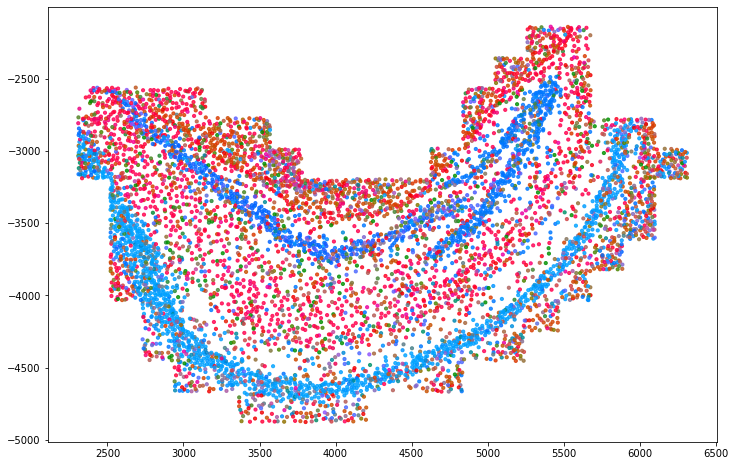

In [8]:
# %%
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=Hippocampus["XY"][:,0],y=Hippocampus["XY"][:,1],
    c=list(map(lambda x:color_dict[x],Hippocampus["Types"])),
    s=10,alpha=0.8)

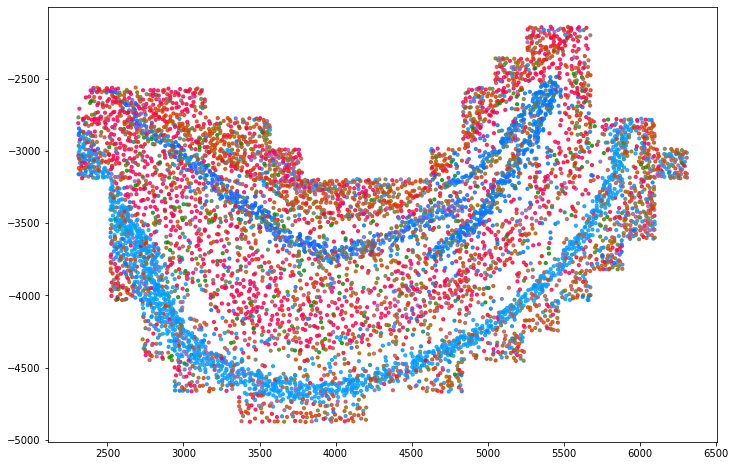

In [9]:
# %%
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=Hippocampus["XY"][:,0],y=Hippocampus["XY"][:,1],
    c=list(map(lambda x:color_dict[x],TypeVec1)),
    s=10,alpha=0.8)

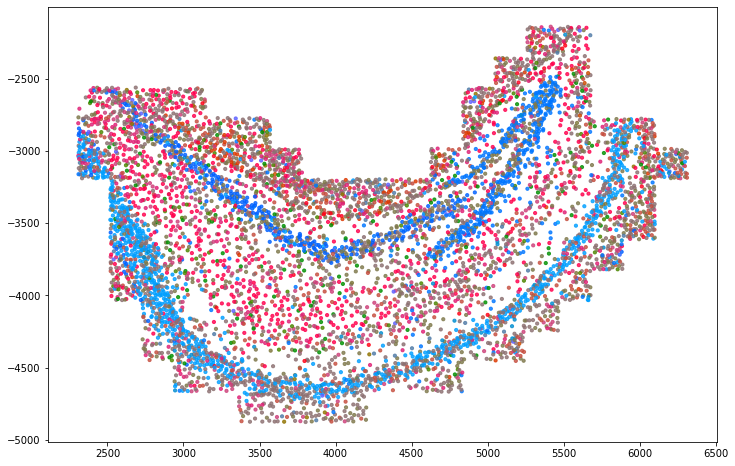

In [10]:
# %%
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=Hippocampus["XY"][:,0],y=Hippocampus["XY"][:,1],
    c=list(map(lambda x:color_dict[x],TypeVec2)),
    s=10,alpha=0.8)

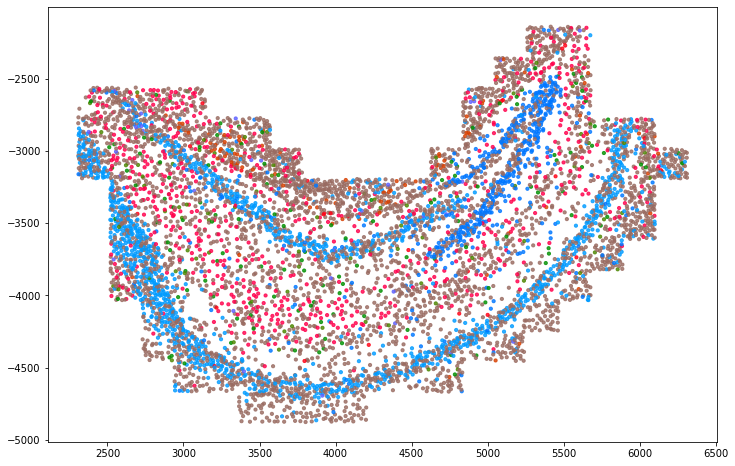

In [11]:
# %%
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=Hippocampus["XY"][:,0],y=Hippocampus["XY"][:,1],
    c=list(map(lambda x:color_dict[x],TypeVec3)),
    s=10,alpha=0.8)